Sample Dataset Preview:
                                           Review  Sentiment
0             I love this product! It works great          1
1    Worst experience ever. Totally disappointed.          0
2           Absolutely fantastic! Will buy again.          1
3  Not good. Poor quality and broke after a week.          0
4      Excellent service and amazing performance!          1

 Accuracy Score: 0.3333333333333333

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3


 Confusion Matrix:
 [[0 2]
 [0 1]]


[nltk_data] Downloading package stopwords to C:\Users\Sahana S
[nltk_data]     Kumbar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


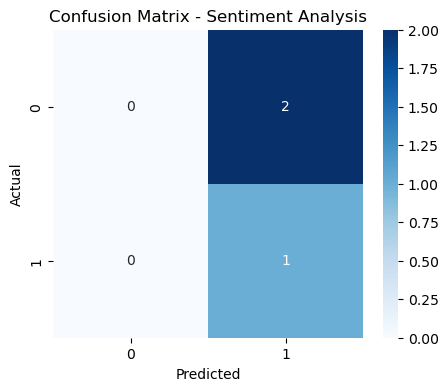

In [16]:
# Sentiment Analysis using TF-IDF and Logistic Regression
# Task: ML Internship - NLP Sentiment Classification

#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Create sample dataset (we can use the csv file also)
data = {
    "Review": [
        "I love this product! It works great",
        "Worst experience ever. Totally disappointed.",
        "Absolutely fantastic! Will buy again.",
        "Not good. Poor quality and broke after a week.",
        "Excellent service and amazing performance!",
        "Terrible. I want a refund!",
        "Very satisfied with the purchase.",
        "Bad quality, waste of money.",
        "Perfect for my needs. Highly recommend!",
        "Awful product. Do not buy!"
    ],
    "Sentiment": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative
}
df = pd.DataFrame(data)
print("Sample Dataset Preview:")
print(df.head())

#Text Preprocessing Function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

#Apply cleaning
df['clean_review'] = df['Review'].apply(clean_text)

#Split data into train and test sets
X = df['clean_review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Build and Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

#Make Predictions
y_pred = model.predict(X_test_tfidf)

#Evaluate the Model
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sentiment Analysis')
plt.show()